# Part II - Ford GoBike Trip Duration per Datetime and User Type
## by Samuel Sarpong


## Investigation Overview


In this investigation, I wanted to take a look at how the duration of trips changes with respect to DateTime and customer type. The main focus was on hours of the day, days of the week and customer type.


## Dataset Overview

The data consists of information regarding approximately 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, and gender, as well as additional variables such as member's year of birth, start and end station name, start and end station longitude and latitude, start and end station unique id among others. About 8000 data points were removed from the analysis due to inconsistencies or missing information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bk = pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [4]:
bk.dropna(inplace=True)

bk['start_time'] = pd.to_datetime(bk['start_time'])
bk['end_time'] = pd.to_datetime(bk['end_time'])

bk['bike_id'] =bk.bike_id.astype(str)



bk['start_day'] = bk['start_time'].dt.day_name()
bk['start_month'] = bk['start_time'].dt.month_name()

bk['start_hr'] = bk['start_time'].dt.hour
bk['start_hr'] = bk.start_hr.astype(str)




bk['end_day'] = bk['end_time'].dt.day_name()
bk['end_month'] = bk['end_time'].dt.month_name()
bk['end_hr'] = bk['end_time'].dt.hour
bk['end_hr'] = bk.end_hr.astype(str)

In [5]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'start_hr': [str(i) for i in range(0,24)],
                    'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bk[var] = bk[var].astype(ordered_var)


## Distribution of Rides by Days
Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records.

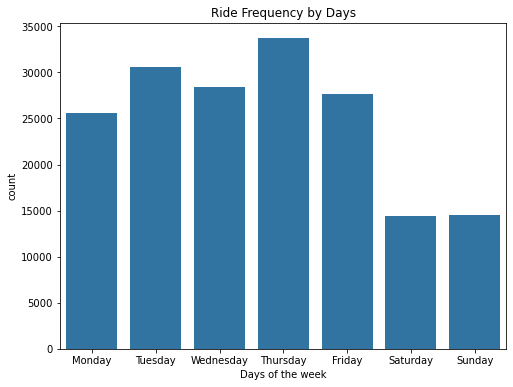

In [6]:
plt.figure(figsize = (8,6))
sb.countplot(data = bk, x = 'start_day', color = sb.color_palette()[0])
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

## Distribution of Rides by Hours

> The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to rush hours where people leave for work and come back later in the evening.

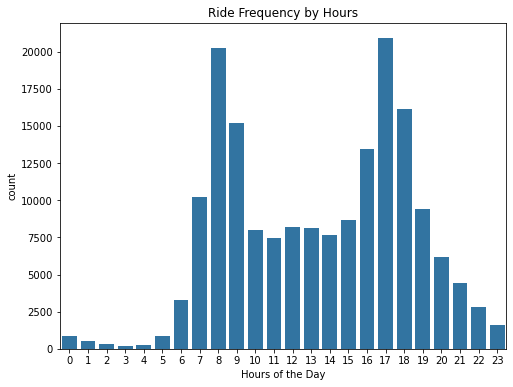

In [7]:
plt.figure(figsize = (8,6))
sb.countplot(data = bk, x = 'start_hr', color = sb.color_palette()[0])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

## Trip Duration across Days and Customer Types

Customer trips take a longer duration regardless of the day of the week(longest on weekends) whereas subscribers generally travel a short distance with a little increase on weekends but not up to that of the customers.


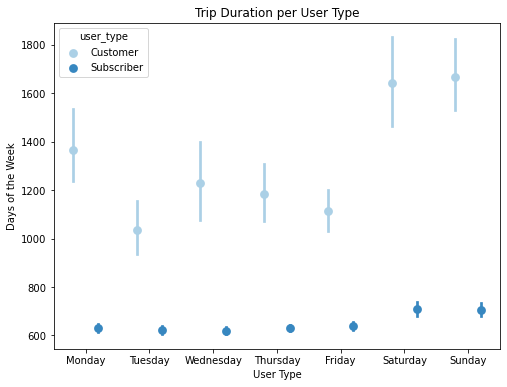

In [8]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bk, x ='start_day', y = 'duration_sec', hue = 'user_type',
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xlabel('User Type')
plt.ylabel('Days of the Week')
plt.title('Trip Duration per User Type')
ax.set_yticklabels([],minor = True);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel.